# HW 15 - Animation
ULAB - Physics and Astronomy Division \
Due **Sunday, March 9th, 2025 at 11:59pm** on Gradescope

## 1 Modify the Animation from Lecture
Modify the given sine wave animation so that the wave moves twice as fast. What parts of the code you you need to change, and why? Please specifically highlight this in your code

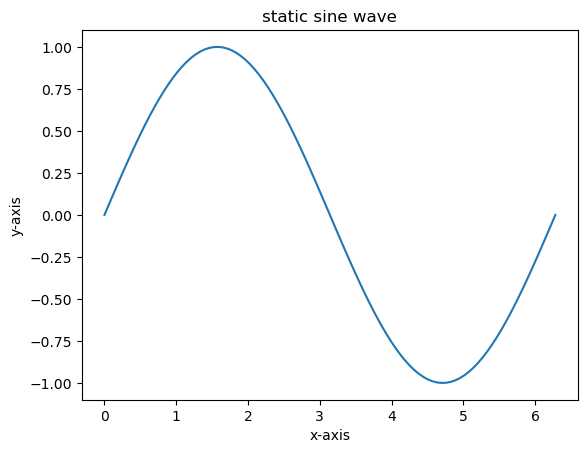

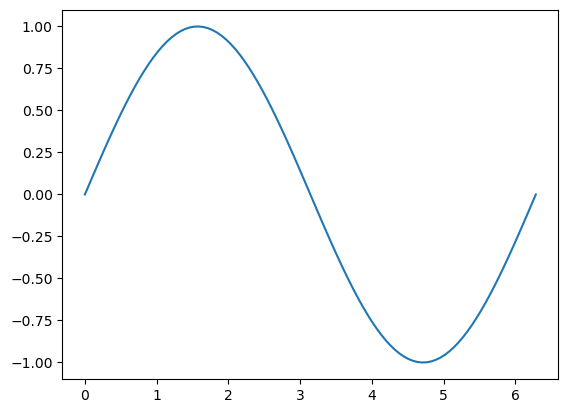

In [175]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# create 100 evenly space x-values from 0 to 2pi
x = np.linspace(0, 2*np.pi, 100)

# calculate the sin of each given x-val
y = np.sin(x)

plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('static sine wave')

# create a figre with axes
fig, ax = plt.subplots()

#create a moving sine wave plot 
# one line, not multiple
line, = ax.plot(x, np.sin(x))

#instead of making lots more lines

import matplotlib.animation as animation

def update(frame):
    """
    Updating my sine wave by shifting horixontally frame(integer) = current frame number, increasing with line, (tuple) = 
    the updated line ibject (being (redrawn)
    """
    line.set_ydata(np.sin(x+frame/5.0)) # divided frames by 5 instead of 10 to double make the sine wave move twice as fast
    return line, 

ani = animation.FuncAnimation(fig, update, frames = 100, interval = 50, blit = True) 
plt.show()
ani.save("animation1.gif", writer='pillow', fps=20) #could double the fps to make the wave move twice as fast

In [ ]:
# Your comment here
# To make the sine wake move twice as fast I halved the number than was dividing the frames in the y data becuase previously it was
# 10 so making it half will double the speed of the moving sine wave. 

Save the animation as a .mp4 or a .gif and include it you repository for submission. 

In [ ]:
# Your code here
# wrote it in the frist cell

Explain what happens if you set `blit=True` in `FuncAnimation`? What happens if you set it to `blit=False`?

In [ ]:
# Your comment here
# When blit is truether func uses a blitting algorithim to determine what parts of the animation need to be redrawn. When blit is 
# false the func will redraw the whole animationm 

## 2 A Different Animation
Write an animation where a dot moves in a circular path instead of sine wave. *Hint: You will need to use `np.sin` and `np.cos`. 

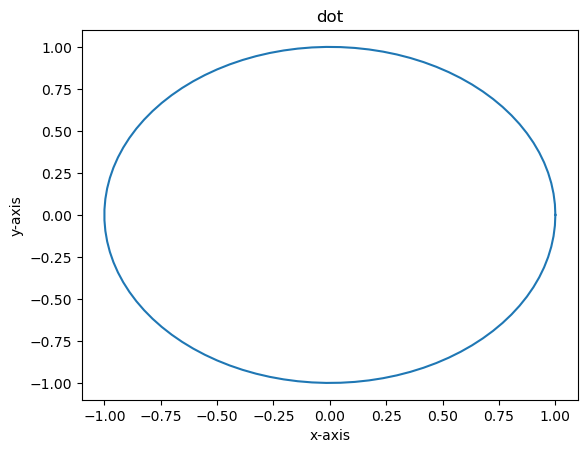

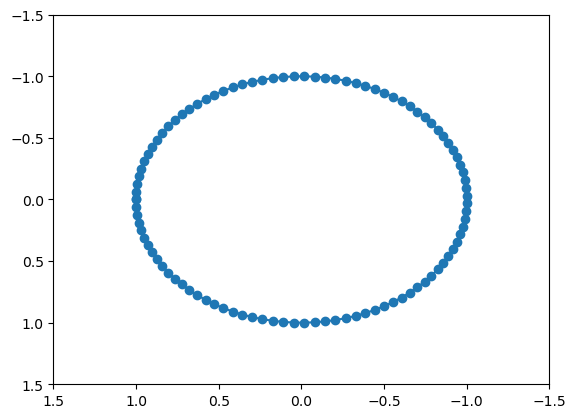

In [144]:
# Your code here
#equation for circle
theta = np.linspace(0, 2*np.pi, 100)
y = np.sin(theta)
x = np.cos(theta)

#creating graph 
plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('dot')

#making subplots with the dot
fig, ax = plt.subplots()
point, = ax.plot(0,1, marker="o")
ax.axis([1.5, -1.5, 1.5, -1.5])

#updates the frame so the dot is at different points
def update(frame):
    point.set_ydata(np.sin(theta+frame/10.0)) 
    point.set_xdata(np.cos(theta+frame/10.0))
    return point,

#animtates the moving dot
ani = animation.FuncAnimation(fig, update, frames = 100, interval = 50, blit = True) 
plt.show()


In [146]:
# Your code here
ani.save("dot_animation.gif", writer='pillow', fps=20) 

## 3 Simulate Orbital Motion of Planets and a Comet
**Check out the `example_solar_system_animation.mp4` as an example of what you will be creating in this problem.**

Now you will simulate and visualize the orbital motion of Earth, Mars and a coment around the Sun using Newtonian gravity and Python. Here are the steps:
* Calculate the gravitational forces acting on each body.
* Update positions and velocities over time.
* Simulate the motion of these celestial bodies over a period of 5 years.
* Animate the results to observe orbital patterns. 

Let's dig a bit into the physics. The motion of celestial bodies follows **Newton's laws of motion and gravitation**:
$$
F = G \frac{m_1 m_1}{r^2}
$$

where:
* $F$ is the gravitational force.
* $G = 6.67\times10^{-11}$ is the gravitational constant
* $m_1$, $m_2$ are the measses of the two objects.
* $r$ is the distance between them.

Using **Newton's Second Law**, the acceleration is given by:

$$
a = \frac{F}{m}
$$

where $a$ is the acceleration, and $m$ is the object's mass. The velocity and position are updated with numerical integration:

$$
v = v + a \cdot dt
$$

$$
x = x + v \cdot dt
$$

## 3.1 Implementing the Simulation
Goal: Set up the **masses**, **initial positions** and **velocities** for the Sun, Earth, Mars and a comet. 
* Use SI units (meters, kilograms, seconds).
* The Sun is at the origin (0, 0, 0)
* Earth, Mars and the commet start at **aphelion** (farthest from the Sun).

Start by defining the following initial variables in kilograms (or SI units):
* `G`
* `Ms` (the mass of the Sun, you will need to google this)
* `Me` (the mass of the Earth)
* `Mm` (the mass of Mars)
* `Mc = 6.39e20` (the mass of a comet)
* `AU` (astronomical unit, distance between Earth and the Sun)
* `daysec` (how many seconds are in a day)

In [153]:
# Your code here
G = 6.674e-11
Ms = 1.9884e30
Me = 5.97e24
Mm = 0.642e24
Mc = 6.39e20
AU = 1.496e11
daysec = 86400

Now we will define some initial velocities in meters per second:
* `e_ap_v` (Earth at aphelion, google it, make sure its in SI units)
* `m_ap_v` (Mars at aphelion)
* `commet_v = 7000` (speed of the comet)

In [156]:
# Your code here
e_ap_v = 152.1e6
m_ap_v = 249.3e6
commet_v = 7000

Run the cell below to define some gravitational constants because we expect no mass loss:

In [202]:
# Your code here
gravconst_e = Ms * G
gravconst_m = Mm * G
gravconst_c = Mc * G

Define the initial positions of the Earth, Mars and the comet. Here is the Earth as an example:
* `xe, ye, ze = 1.0167 * AU, 0, 0`

Follow the same pattern for Mars (where the `x` coordinate is at `1.666 * AU`, everything else is zero) and the comet (where the `x` coordinate is at `2* AU`, the `y` coordinate is `0.3 * AU` and the `z` coordinate is zero) . Remember the sun is at the origin! 

In [205]:
# Your code here
xe, ye, ze = 1.0167 * AU, 0, 0
xm, ym, zm = 1.52 * AU, 0, 0
xc, yc, zc = 2 * AU, 0.3 * AU, 0
xs, ys, zs = 0, 0, 0


We will do the same thing but for initial velocities. Here is Earth as an example:
* `xve, yve, zve = 0, e_ap_v, 0`

Make variables for Mars but with `m_ap_v` as the `y` coordinate. Make variables for the commet but with `commet_v` as the `y` coordinate.

In [208]:
# Your code here
xve, yve, zve = 0, e_ap_v, 0
xvm, yvm, zvm = 0, m_ap_v, 0
xvc, yvc, zvc = 0, commet_v, 0

Assume the Sun is at the origin. Make initial positions and velocities for the Sun. It should not be moving so all its velocities coordinates are zero. 

In [222]:
# Your code here
xvs, yvs, zvs = 0, 0, 0

Now we will define some time parameters for our simulation. Create variable for the initial time `t` and set it to zero. Create a variable called `dt` for the change in time (steps per day) and set it to `1 * daysec`. Create a varible for `years` and set it to `5`. Finally, create a varible for `sim_years` and set it equal to `years * 365 * daysec`.

In [214]:
# Your code here
t = 0
dt = 1 * daysec
years = 5
sim_years = years * 365 * daysec

Create empty lists to store all of your varibles. Run the cell below.

In [217]:
# Store the orbits:

xelist = []
yelist = []
xmlist = []
ymlist = []
xclist = []
yclist = []
xslist = []
yslist = []


## 3.2 Compute Gravitational Forces and Update Positions
Goal:
* Implement the **gravitational force equation** to calculate the force acting on each body.
* Compute accelerations using $a = F/m$.
* Update **velocity** and **position**.
* Use a loop to update positions over **5 years**.
* Store the results in lists for plotting.

I will do this part for you, it requires some physics knowledge. But you need to turn this into a loop for when time is less than the simulation time. You want the loop to repeat it itself until that condition is met. 

In [277]:
# Your code here
################ Earth #############
rx, ry, rz = xe - xs, ye - ys, ze - zs
modr3_e = (rx**2 + ry**2 + rz**2)**1.5
fx_e = -gravconst_e * rx / modr3_e
fy_e = -gravconst_e * ry / modr3_e
    
xve += fx_e * dt / Me
yve += fy_e * dt / Me
xe += xve * dt
ye += yve * dt
    
xelist.append(xe)
yelist.append(ye)

################ Mars ##############
rx_m, ry_m, rz_m = xm - xs, ym - ys, zm - zs
modr3_m = (rx_m**2 + ry_m**2 + rz_m**2)**1.5
fx_m = -gravconst_m * rx_m / modr3_m
fy_m = -gravconst_m * ry_m / modr3_m
    
xvm += fx_m * dt / Mm
yvm += fy_m * dt / Mm
xm += xvm * dt
ym += yvm * dt
    
xmlist.append(xm)
ymlist.append(ym)

################ Comet ##############
rx_c, ry_c, rz_c = xc - xs, yc - ys, zc - zs
modr3_c = (rx_c**2 + ry_c**2 + rz_c**2)**1.5
fx_c = -gravconst_c * rx_c / modr3_c
fy_c = -gravconst_c * ry_c / modr3_c
    
xvc += fx_c * dt / Mc
yvc += fy_c * dt / Mc
xc += xvc * dt
yc += yvc * dt
    
xclist.append(xc)
yclist.append(yc)

################ Sun ##############
xvs += -(fx_e + fx_m) * dt / Ms
yvs += -(fy_e + fy_m) * dt / Ms
xs += xvs * dt
ys += yvs * dt
xslist.append(xs)
yslist.append(ys)

t += dt

## 3.3 Visualization
Goal: Plot the Orbits
* After simulating the motion, **plot the orbits of Earth, Mars and the comet**.
* Label the **Sun**, **Earth**, **Mars**, and **Comet**.

Start by making a figure, set the argument of`figsize=(8, 8)`.
* Plot the `yelist` as a function of `xelist`. Do this for the `xm`, `xc` and `xs` lists as well. Make sure each line is a **different color**!
  * The Sun will just be a point, so give it a markersize of `10`. Make it yellow.  
* Give it a legend
* Add an `xlabel` of `"X Position (m)"`.
* Add an `ylabel` of `"Y Position (m)"`.
* Give it a title.
* Add a grid.
* Show the plot.

TypeError: 'str' object is not callable

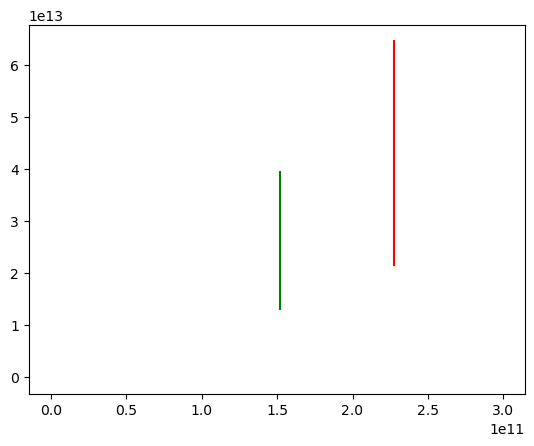

In [309]:
# Your code here 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
figsize = (8,8)
line, = ax.plot(xelist, yelist, color='green')
line, = ax.plot(xmlist, ymlist, color='red')
line, = ax.plot(xclist, yclist, color='black')
point, = ax.plot(xslist, yslist, markersize = 10, color='yellow')
plt.plot()
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('positions of a Sun, Earth, Mars, and comet system')
plt.grid()
plt.show()

Goal: Animate the Motion
* Create an animated visualization of planetary orbits.
* Track the motion of each body over time.

\
Follow the procedure from lecture. Here are some hints:
* Set the `x` and `y` limits to `-3 * AU` to `3 * AU`. \


* Unpack the lines for Earth, Mars, the commet. Example: 
  * `line_e = axplot([], [], '-g', lw=1)` \

  
* Unpack the points for Earth, Mars, the commet and the Sun. Example:
  * `point_e, = ax.plot([],[],'bo',markersize=4)` \

* Give a title to each of the objects. Example:
  * `text_e  = ax.text(AU,0,'Earth')`

* Create the `update` function and update the lines, points and text you just unpacked. Example:
  * `line_e.set_data(xelist[:i], yelist[:i])` 
  * `point_e.set_data(xelist[i], yelist[i])`\
  * `text_e.set_position((xelist[i],yelist[i]))`


* Create the animation! Set `frames = len(xelist)`, `interval=1` and `blit=True`. 

In [ ]:
# Your code here

## 3.4 Add Mercury, Venus and the Moon!
As an extra challenge, give your best attempt at simulating Mercury, Venus and/or the Moon! I am not going to give you a ton of hints for this problem. Come to office hours if you have questions :)

In [ ]:
# Your code here

Save you animation as a `.gif` or as a `.mp4`. Include this in your submission! This may take up to a couple mintutes!

In [ ]:
# Your code here
anim.save("system_animation.git", writer="pillow", fps=20)

Upload this notebook and your animations to Gradescope!